## Этапы EDA

**В первую очередь, необходимо очистить данные** —  удалить или заполнить пропуски, убрать дубликаты, выявить ошибки в данных. Дополнительно нужно понять природу ошибок данных — от чего они возникли и тогда это поможет настроить наш pipeline (рабочий конвейер) или исправить источник данных.

**Далее, ознакомьтесь с данными** —  прежде чем начать анализировать данные, необходимо изучить их и понять, что они представляют. Изучите каждый из столбцов в наборе данных и определите, какие переменные могут быть полезны для анализа. Воспользуйтесь описательной статистикой: info, describe, и т.д. это поможет нам дополнительно посмотреть значения в данных, найти среднюю и медиану и самые встречающиеся значения в категориальных переменных.

**Визуализируйте.** После ознакомления с данными можно приступить к визуализации данных с помощью библиотек. Визуализация данных помогает более наглядно представить информацию и быстрее выявить тренды и аномалии в данных. Для этого можно использовать диаграммы рассеяния, диаграммы корреляции, гистограммы и другие.

**Дополните и обработайте данные.** Обработка данных включает в себя преобразование данных и создание новых переменных на основе имеющихся. Это может включать в себя изменение типов данных, создание новых столбцов с помощью формул, группировку данных и многое другое.

**Оцените корреляцию между переменными.** Один из важных аспектов анализа данных —  это оценка корреляции между переменными. Корреляция может помочь определить, как две переменные взаимодействуют друг с другом и как они влияют на целевую переменную. Для оценки корреляции можно использовать матрицу корреляции и построить heatmap для простоты интерпретации.

**Изучите выбросы.** Очень часто в данных наблюдаются значения, которые не соответствуют основному распределению данных - аномальные данные. `Outliers`, то есть выбросы, могут значительно исказить исследование и нарушить работу модели машинного обучения. И всегда конечное решение - оставить их или удалить/заменить принимается лишь на основе EDA.

**Проведите статистический анализ.** Статистический анализ может помочь определить, какие переменные статистически значимы и как они взаимодействуют друг с другом. Этот анализ может включать различные тесты и проверку гипотез. Возможно, что проведя какой-либо тест и найдя взаимосвязь с целевой переменной, вы сможете создать такой признак, который даст наилучший прирост к прогнозирующей способности нашей модели.

**Сделайте конечный вывод.** Объедините все этапы выше в одну краткую выжимку. Так вы сможете быстро объяснить, какие есть тренды и аномалии и дать подробный отчет по этим данным для человека, не работающим с кодом. На основе конечного вывода можно выбрать наилучшую модель для таких данных и сделать данные более информативными.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('ds_salaries.csv')
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2641,2022,Сеньёр,FT,Data Architect,66000.0,USD,66000,US,100,US,M
2118,2020,Миддл,FT,Business Data Analyst,95000.0,USD,95000,US,0,US,M
2212,2022,Сеньёр,FT,Data Scientist,120000.0,USD,120000,US,0,US,M
1734,2023,Сеньёр,FT,Data Analyst,130000.0,USD,130000,US,100,US,M
593,2023,Сеньёр,FT,Data Engineer,160000.0,USD,160000,US,100,US,M


In [3]:
df.shape

(3755, 11)

- `work_year`: Год, в котором была выплачена зарплата. 
- `experience_level`: Уровень опыта в работе. 
- `employment_type`: Тип занятости для данной должности. 
- `job_title`: Должность, на которой работал в течение года. 
- `salary`: Общая сумма валовой зарплаты, выплаченной. 
- `salary_currency`: Валюта выплаты зарплаты в коде валюты ISO 4217. 
- `salaryinusd`: Зарплата в USD. 
- `employee_residence`: Основная страна проживания сотрудника во время работы в течение года по коду страны ISO 3166. 
- `remote_ratio`: Общее количество удаленной работы. 
- `company_location`: Страна главного офиса работодателя или филиала. 
- `company_size`: Медианный размер числа сотрудников, которые работали в компании по итогам года.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           3755 non-null   int64  
 1   experience_level    3755 non-null   object 
 2   employment_type     3755 non-null   object 
 3   job_title           3755 non-null   object 
 4   salary              3654 non-null   float64
 5   salary_currency     3755 non-null   object 
 6   salary_in_usd       3755 non-null   int64  
 7   employee_residence  3755 non-null   object 
 8   remote_ratio        3755 non-null   int64  
 9   company_location    3755 non-null   object 
 10  company_size        3755 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 322.8+ KB


In [5]:
df.duplicated().sum()

np.int64(1128)

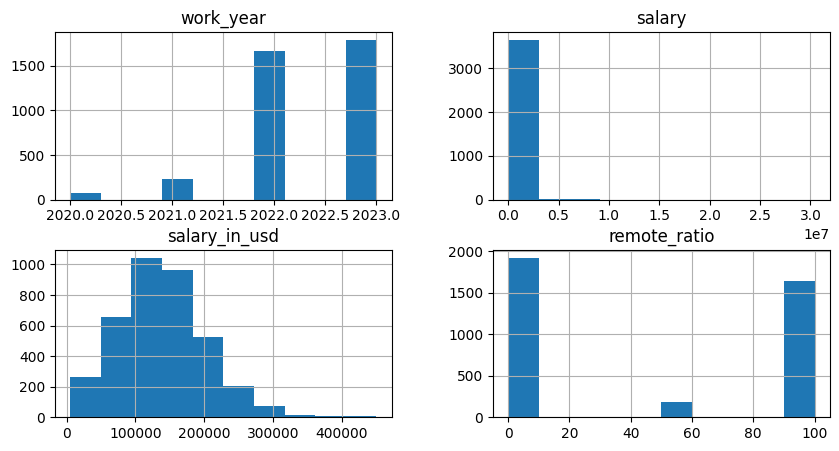

In [6]:
df.hist(figsize=(10,5)); 

In [7]:
df.isna().sum()

work_year               0
experience_level        0
employment_type         0
job_title               0
salary                101
salary_currency         0
salary_in_usd           0
employee_residence      0
remote_ratio            0
company_location        0
company_size            0
dtype: int64

Имеем 101 пропуск в столбце `salary`, но перед тем как работать с пропусками тщательно исследуем наши данные

# Исследовательский анализ данных

## Работа с категориальными признаками

In [8]:
df.experience_level.unique()

array(['Сеньёр', 'Миддл', 'Джуниор', 'ТимЛид\\Директор'], dtype=object)

### Experience Level

Всего в столбце `expereince_level` 4 уникальных категориальных признаков:


*  EN, что означает `Джуниор`.

*   MI, что означает `Миддл`.

*   SE, что означает `Сеньёр`.

*   EX, что означает `ТимЛид\Директор`.


In [9]:
df['experience_level'].value_counts()

experience_level
Сеньёр             2516
Миддл               805
Джуниор             320
ТимЛид\Директор     114
Name: count, dtype: int64

In [10]:
ex_level = df['experience_level'].value_counts()
px.bar(ex_level, text_auto=True, labels={'value':'Количество вакансий', 'experience_level':'Опыт работы'}, width=800, height=600 )

Из столбчатой диаграммы выше видно, что наибольшее кол-во аккаунтов имеют Сеньёры, потом уже Миддл, Джуниор, ТимЛид

### Должности

In [11]:
print('Количество уникальных наименований должностей в столбце job_title :', df['job_title'].nunique())

Количество уникальных наименований должностей в столбце job_title : 93


Посмотрим на топ-15 наиболее популярных должностей

In [12]:
top15_job_title = df['job_title'].value_counts()[:15]

fig = px.bar(x = top15_job_title.index, y=top15_job_title.values,
             text = top15_job_title.values, title='Топ-15 должностей', width=1000, height=600)

fig.update_layout(xaxis_title='Должность', yaxis_title='Количество')
fig.show()

Первый топ занимает наша любимая тройка:
 - `Data Engineer `
 - `Data Scientist`
 - `Data Analyst`

### Тип занятости (Employment type)

In [13]:
df.employment_type.unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

Всего в столбце 4 уникальных категории : 


*   PT : Part-time

*   FT : Full-time

*   CT : Contract

*   FL : Freelance


In [14]:
group = df['employment_type'].value_counts()
emp_type = ['Full-Time', 'Part-Time', 'Contracts', 'Freelance']

fig = px.bar(x=emp_type, y=group.values, 
             color = group.index, text=group.values,
             title='Распределение типа занятости', width=800, height=600)

fig.update_layout(xaxis_title='Тип занятости', yaxis_title='Количество')
fig.show()

Почти все работники имеют тип занятости `Full-Time`

### Страна проживания сотрудника

In [15]:
df['employee_residence'].value_counts()

employee_residence
US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
RS       1
NZ       1
MD       1
LU       1
MT       1
Name: count, Length: 78, dtype: int64

In [16]:
top15_emp_locations = df['employee_residence'].value_counts()[:15]

fig = px.bar(x = top15_emp_locations.index, y = top15_emp_locations.values,
             color = top15_emp_locations.index, text_auto=True,
             title='Топ 15 стран проживания', width=1000, height=500)
fig.update_layout(xaxis_title='Страна проживания', yaxis_title='Количество')
fig.show()

### Размер компании

In [17]:
group = df['company_size'].value_counts()

fig = px.bar(x=group.index, y=group.values, 
             color=group.index, text_auto=True,
             title='Распределение компаний по размеру')

fig.update_layout(xaxis_title='Размер компании', yaxis_title='Количество')
fig.show()

Размер компаний в основном состоит из средних компаний, а затем крупных, за которыми следуют маленькие стартапы.

## Работа с числовыми признаками

### Год работы

In [18]:
work_year = df['work_year'].value_counts()
fig = px.pie(values=work_year.values, names=work_year.index,
             title='Распределение по году работы')
fig.show()

Данные за 2023 год составляют около 47% в наборе данных, за которыми следуют данные за 2022 год и так далее. Это показывает огромный рост в данной области с течением лет!

### Зарплата в USD

In [19]:
fig = px.box(y=df['salary_in_usd'], title='Зарплата в USD')
fig.show()

In [25]:
df = df[df['salary_in_usd'] < 295000] # Избавимся от выбросов

In [26]:
hist_data = [df['salary_in_usd']]
group_labels = ['salary_in_usd']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, )
fig.update_layout(title='Распределение зарплаты в USD', width=1000)
fig.show()

Видно что в основном зарплата распределена в пределах 95/100k - 175/180k USD.

### Степень работы на удалёнке :)

Степень удаленной работы состоит из трёх типов : 


*   0 : Без удалённой работы (меньше 20%) 

*   50 : Частично удалённо

*   100 : Полностью удалённо (более 80%)

In [27]:
remote_type = ['Полностью удаленно', 'Частично удаленно', 'Не удаленно']

fig = px.bar(x=remote_type, y=df['remote_ratio'].value_counts().values,
             color=remote_type, text=df['remote_ratio'].value_counts().values,
             title='Распределение типа работы')

fig.update_layout(xaxis_title='Тип работы', yaxis_title='Количество')
fig.show()

Начиная с 2023 года, большинство компаний все еще придерживаются полностью удаленного формата работы, за которым следует гибридный / частично удаленный формат, а затем политика без удаленной работы.

# 3. Анализ года работы

Мы делаем это, чтобы проверить, не изменится ли со временем удаленное соотношение.

## Степень удалённой работы по годам

In [33]:
remote_year = df.groupby(['work_year', 'remote_ratio']).size()
ratio_2020 = np.round(remote_year[2020].values/remote_year[2020].values.sum(),2)
ratio_2021 = np.round(remote_year[2021].values/remote_year[2021].values.sum(),2)
ratio_2022 = np.round(remote_year[2022].values/remote_year[2022].values.sum(),2)
ratio_2023 = np.round(remote_year[2023].values/remote_year[2023].values.sum(),2)

fig = go.Figure()
categories = ['Без удаленки', 'Частично удаленно', 'Полностью удаленно']
fig.add_trace(go.Scatterpolar(
    r = ratio_2020, theta = categories,
    fill = 'toself', name = '2020 степень удаленной работы'
))

fig.add_trace(go.Scatterpolar(
    r = ratio_2021, theta = categories,
    fill = 'toself', name = '2021 степень удаленной работы'
))

fig.add_trace(go.Scatterpolar(
    r = ratio_2022, theta = categories,
    fill = 'toself', name = '2022 степень удаленной работы'
))

fig.add_trace(go.Scatterpolar(
    r = ratio_2023, theta = categories,
    fill = 'toself', name = '2023 степень удаленной работы'
))

fig.update_layout(title='Степени удаленной работы', width=800,)

fig.show()

Как видно из графика, мы наблюдаем, что:

Удаленная работа достигла максимума в 2021 году, и это можно объяснить пандемией. С течением времени политика удаленной работы не была вновь применена, как это произошло в 2023 году.

# 4. Анализ опыта работы

In [35]:
exp_type = df.groupby(['experience_level', 'employment_type']).size()
exp_type

experience_level  employment_type
Джуниор           CT                    2
                  FL                    2
                  FT                  301
                  PT                   14
Миддл             CT                    5
                  FL                    5
                  FT                  787
                  PT                    3
Сеньёр            CT                    2
                  FL                    3
                  FT                 2468
ТимЛид\Директор   FT                  100
dtype: int64

In [36]:
exp_type = df.groupby(['experience_level', 'employment_type']).size()

fig = go.Figure(data = [
    go.Bar(name='Джуниор', x=exp_type['Джуниор'].index,
           y=exp_type['Джуниор'].values, text=exp_type['Джуниор'].values),
    
    go.Bar(name='Миддл', x=exp_type['Миддл'].index,
        y=exp_type['Миддл'].values, text=exp_type['Миддл'].values),

    go.Bar(name='Сеньёр', x=exp_type['Сеньёр'].index,
        y=exp_type['Сеньёр'].values, text=exp_type['Сеньёр'].values),

    go.Bar(name='ТимЛид\Директор', x=exp_type['ТимЛид\Директор'].index,
        y=exp_type['ТимЛид\Директор'].values, text=exp_type['ТимЛид\Директор'].values),
])

fig.update_layout(xaxis_tickangle=-45, title='Степень опытности в зависимости от типа занятости')
fig.show()

На полный рабочий день, наибольшее присутствие представлено старшими сотрудниками, за которыми следуют новички, а затем руководители.

## Топ-5 профессий, основанных на опыте

In [41]:
exp_job = df.groupby(['experience_level', 'job_title']).size()

entry_top5 = exp_job['Джуниор'].sort_values(ascending=False)[:5]
executive_top5 = exp_job['ТимЛид\Директор'].sort_values(ascending=False)[:5]
mid_top5 = exp_job['Миддл'].sort_values(ascending=False)[:5]
senior_top5 = exp_job['Сеньёр'].sort_values(ascending=False)[:5]

exp_type = df.groupby(['experience_level', 'employment_type']).size()

fig = go.Figure(data=[
    go.Bar(name='Джуниор', x=entry_top5.index,
           y=entry_top5.values, text=entry_top5.values),

    go.Bar(name='ТимЛид\Директор', x=executive_top5.index,
        y=executive_top5.values, text=executive_top5.values),

    go.Bar(name='Миддл', x=mid_top5.index,
        y=mid_top5.values, text=mid_top5.values),

    go.Bar(name='Сеньёр', x=senior_top5.index,
        y=senior_top5.values, text=senior_top5.values)        
])

fig.update_layout(xaxis_tickangle=-45, title='Уровень опыта с наиболее распространенными профессиями',
                  width=1000)
fig.show()

**Наблюдения**

* В Data Architect работает большое количество опытных людей.

* На начальном/юниорском уровне, как правило, больше занимаются Data Analyst, Data scientist, Data engineer.

* Middle-уровень наиболее распространён в Data Engineer, потом Data Analyst, Data Scientist.

* Уровень ТимЛида преобладает в Data Engineer, и совсем немного в Data Science.

## Размер компании учитывая опыт сотрудника

In [43]:
exp_size = df.groupby(['experience_level', 'company_size']).size()

fig = go.Figure(data=[
    go.Bar(name='Джуниор', x=exp_size['Джуниор'].index,
           y=exp_size['Джуниор'].values, text=exp_size['Джуниор'].values),
    
    go.Bar(name='ТимЛид\Директор', x=exp_size['ТимЛид\Директор'].index,
           y=exp_size['ТимЛид\Директор'].values, text=exp_size['ТимЛид\Директор'].values),
    
    go.Bar(name='Миддл', x=exp_size['Миддл'].index,
           y=exp_size['Миддл'].values, text=exp_size['Миддл'].values),
    
    go.Bar(name='Сеньёр', x=exp_size['Сеньёр'].index,
           y=exp_size['Сеньёр'].values, text=exp_size['Сеньёр'].values),
])
fig.update_layout(xaxis_tickangle=-45, title='Experience Level with Company Size')
fig.show()

**Наблюдения**:
 
* В крупных компаниях в основном старшие сотрудники, за ними следуют промежуточные, а затем новички. Очень мало руководителей.

* В компаниях среднего размера в основном старшее звено, затем среднее и начальное. Руководители немного выделяются по сравнению с крупными компаниями.

* Для малых компаний / стартапов, мы видим, что они состоят из всех трех уровней, кроме руководителей, пропорционально.

In [44]:
work_2020 = df.loc[(df['work_year'] == 2020)]
work_2021 = df.loc[(df['work_year'] == 2021)]
work_2022 = df.loc[(df['work_year'] == 2022)]
work_2023 = df.loc[(df['work_year'] == 2023)]
 
hist_data = [work_2020['salary_in_usd'], work_2021['salary_in_usd'], 
            work_2022['salary_in_usd'], work_2023['salary_in_usd']]
group_labels = ['2020 salary', '2021 salary', '2022 salary', '2023 salary']

year_salary = pd.DataFrame(columns = ['2020', '2021', '2022', '2023'])
year_salary['2020'] = work_2020.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2021'] = work_2021.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2022'] = work_2022.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2023'] = work_2023.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data=px.bar(x = year_salary.columns, 
                            y = year_salary.values.tolist()[0],
                            color = year_salary.columns,
                            title = 'Средняя зарплата по году'))

fig1.update_layout(title = 'Распределение зарплат по году')
fig2.update_layout(xaxis_title = "Год", yaxis_title = "Средняя зарплата")
fig1.show()
fig2.show()

Видим что с течением времени тренд на увеличение зарплаты растёт

## Зарплата основанная на опыте работы

In [46]:
exp_salary = df[['experience_level','salary_in_usd']]

entry_salary = exp_salary.loc[exp_salary['experience_level'] == 'Джуниор']
executive_salary = exp_salary.loc[exp_salary['experience_level'] == 'ТимЛид\Директор']
mid_salary = exp_salary.loc[exp_salary['experience_level'] == 'Миддл']
senior_salary = exp_salary.loc[exp_salary['experience_level'] == 'Сеньёр']

hist_data = [entry_salary['salary_in_usd'], mid_salary['salary_in_usd'], senior_salary['salary_in_usd'], executive_salary['salary_in_usd']]
group_labels = ['Джуниор', 'Миддл', 'Сеньёр', 'ТимЛид\Директор']

means = [entry_salary['salary_in_usd'].mean(), mid_salary['salary_in_usd'].mean(),
    senior_salary['salary_in_usd'].mean(), executive_salary['salary_in_usd'].mean(),]

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data=px.bar(x = group_labels, y = means, color = group_labels,
                            title = 'Средняя зарплата по опыту работы'))
                            
fig1.update_layout(title = 'Распределение зарплат по опыту работы', width=1000)
fig2.update_layout(xaxis_title = "Опыт работы", yaxis_title = "Средняя запрплата", width=1000)
fig1.show()
fig2.show()

Также видим увеличение зарплаты с увеличением опыта работы

## Зарплата в зависимости размера компании

In [48]:
company_size = df[['company_size','salary_in_usd']]
small = exp_salary.loc[company_size['company_size'] == 'S']
mid = exp_salary.loc[company_size['company_size'] == 'M']
large = exp_salary.loc[company_size['company_size'] == 'L']
hist_data = [small['salary_in_usd'], mid['salary_in_usd'], large['salary_in_usd']]
group_labels = ['Размер компании: Маленькая\Стартап', 'Размер компании: Средняя', 'Размер компании: Большая']

means = [small['salary_in_usd'].mean(), mid['salary_in_usd'].mean(), large['salary_in_usd'].mean()]

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data = px.bar(x = group_labels, y = means, color = group_labels,
                title = 'Средняя зарплата в зависимости от размера компании'))

fig1.update_layout(title = 'Распределение заработной платы по размеру компании', width=1000)
fig2.update_layout( xaxis_title = "Размер компании", yaxis_title = "Средняя зарплата", width=1000)
fig1.show()
fig2.show()

Очевидно, что средние по размеру компании распределяются по более высоким зарплатам, а крупные компании имеют более высокие зарплаты, чем малые.

Таким образом, мы можем сделать вывод, что крупные компании не обязательно имеют более высокие зарплаты, чем средние.

## Топ должностей по зарплате

In [49]:
salary_designation = df.groupby(['salary_in_usd', 'job_title']).size().reset_index()
salary_designation = salary_designation[-25:]
fig = px.bar(x = salary_designation['job_title'], y = salary_designation['salary_in_usd'],
            text = salary_designation['salary_in_usd'], color = salary_designation['salary_in_usd'])

fig.update_layout( xaxis_title = "Должности", yaxis_title = "Зарплаты ")
fig.update_layout(xaxis_tickangle = -45, 
                  title = 'Топ-25 должностей по зарплате')

Видим что наиболее высокие зарплаты имеют Research Scientist, Data Scientist, Data Analyst

In [ ]:
sns.heatmap(df[['work_year','salary','salary_in_usd','remote_ratio']].corr(), annot = True)
plt.title('Матрица корреляций'); 